<a href="https://colab.research.google.com/github/Noahkandie/Pancreatic-cancer-study/blob/Dev/Cancer_survival_rates_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [ ]:
# Load data
df= pd.read_csv('/content/KNH_data var.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Card_No                                    64 non-null     int64  
 1   Age                                        64 non-null     int64  
 2   Gender                                     64 non-null     object 
 3   marital_status                             64 non-null     object 
 4   Education                                  64 non-null     object 
 5   occupation                                 64 non-null     object 
 6   Subsance_use                               64 non-null     object 
 7   Family_Histroy_cancer                      64 non-null     object 
 8   Histological_type                          64 non-null     object 
 9   Location_of_cancer                         64 non-null     object 
 10  stage_cancer                

In [ ]:
df.head()

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


In [ ]:
# data cleaning
df.isnull().value_counts()

Card_No  Age    Gender  marital_status  Education  occupation  Subsance_use  Family_Histroy_cancer  Histological_type  Location_of_cancer  stage_cancer  comorbidity  Hypertension  RVD    DM     COPD   DVT    NO_comorbdity  Treatment_Regimen  Any_Regimen_change  Types_of_chemo_regimen  No_cycles_chemo  Type_pallative_care  No_drugs_given  Size_Tumor  Tumor_markers  Type_Tumor_markers  Distant_Metastasis  Site_Metastasis  Status  Survival_time  Metastasis_free_survival  Cancer_specific_survival_after_Metastasis  Time_Recurrence  Status_Remission  Age_categories
False    False  False   False           False      False       False         False                  False              False               False         False        False         False  False  False  False  False          False              False               False                   False            False                False           False       False          False               False               False            False   Fa

In [ ]:
# Clean data
# After passing through the data we got an anomaly at status remission 
# we Drop that anomaly
df.drop(df.loc[df['Status_Remission']=='.'].index, inplace=True)

In [ ]:
df['Status_Remission'].nunique()

4

Univariate analysis

In [ ]:
# Age description

df['Age'].describe()

# mean age is around 60. older people affected
# std dev, means variation is high

count    63.000000
mean     60.698413
std      12.445539
min      32.000000
25%      53.000000
50%      60.000000
75%      70.000000
max      85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Histogram on age')

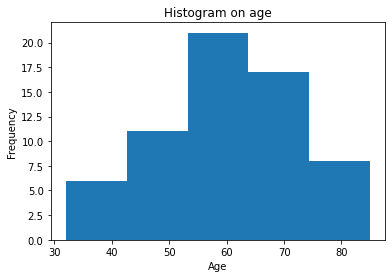

In [ ]:
# Check age distribution
age=df['Age']
#print(age)
age.plot(kind='hist',bins=5)
plt.xlabel('Age')
plt.title('Histogram on age')
# Data seems nomarlized

stage III    32
stage IV     23
stage II      5
stage I       3
Name: stage_cancer, dtype: int64


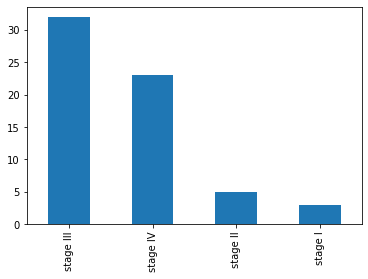

In [ ]:
# Bar graphs on cancer stages
stage=df['stage_cancer'].value_counts()
print(stage)
stage.plot(kind='bar')

# Stage 3 and 4 comprise majority of the diagnosed stages

Pallative care                       30
Chemotherapy                         20
Combination therapy                   6
surgery                               5
Treatment refusal/missing regimen     2
Name: Treatment_Regimen, dtype: int64


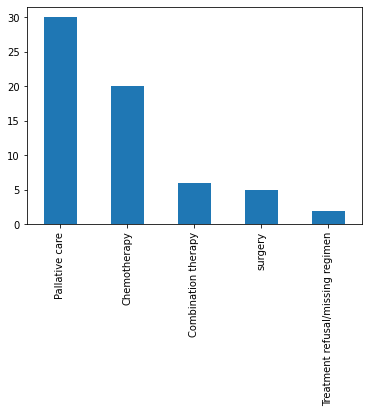

In [ ]:
# Treatment bar graphs
treatment=df['Treatment_Regimen'].value_counts()
print(treatment)
treatment.plot(kind='bar')
# Pallative care and chemotherapy are the most used treatment plans
# Two subjects refused treatment

female    34
male      29
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender bargraph')

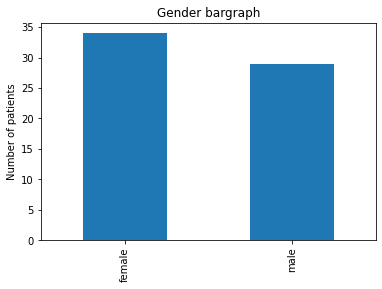

In [ ]:
# Gender bargraph
gender=df['Gender'].value_counts()
print(gender)
gender.plot(kind='bar')
plt.ylabel('Number of patients')
plt.title('Gender bargraph')
# the gender distribution is 34 Females abd 30 males

present    32
absent     31
Name: comorbidity, dtype: int64


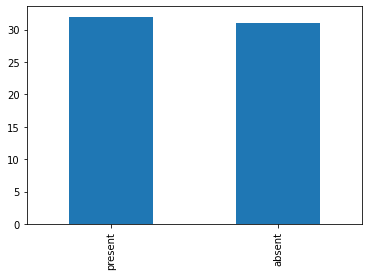

In [ ]:
# Presence of comorbidity
commobidity=df['comorbidity'].value_counts()
print(commobidity)
commobidity.plot(kind='bar')

# Equal number of commorbidity presence and absence in the data

In [ ]:
# SKewness and kurtosis
skw=df['Age'].skew()
print('skewness= ',skw)
krt=df['Age'].kurt()
print('kurtosis= ',krt)

# we notice a weak negative skewness and kurtosis
# This i

skewness=  -0.10943829265637581
kurtosis=  -0.30923030832417764


Bivariate Analysis

In [ ]:
df[:5]

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


In [ ]:
#df = df['Status'].applymap(lambda x: str(x).rstrip('(Survived or Unknown status)'))

In [ ]:
x=df.groupby('stage_cancer')
x1=x['Status'].value_counts()


In [ ]:
# Frequenct tables of stage of cancer and status of patient
x=df.groupby('stage_cancer')
x['Status'].value_counts()

stage_cancer  Status                              
stage I       Censured(Survived or Unknown status)     3
stage II      Censured(Survived or Unknown status)     5
stage III     Censured(Survived or Unknown status)    27
              death                                    5
stage IV      Censured(Survived or Unknown status)    15
              death                                    8
Name: Status, dtype: int64

Text(0.5, 1.0, 'Comparison of patient status and number of patients')

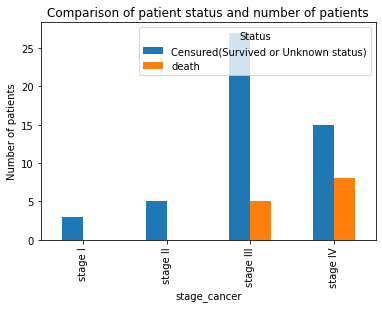

In [ ]:
# Bar graph on stage cancer and status
df1=df.groupby('stage_cancer')
df1['Status'].value_counts().unstack().plot.bar()
plt.ylabel('Number of patients')
plt.title('Comparison of patient status and number of patients')
# Death occurs in stage 3 and 4
# majority of the patients are later stages.

In [ ]:
# Frequency table on the stage of cancer and status of remission of cancer
x=df.groupby('stage_cancer')
x['Status_Remission'].value_counts()

stage_cancer  Status_Remission          
stage I       Complete remission             1
              Non-response                   1
              Progression of the disease     1
stage II      Complete remission             2
              Partial remission              2
              Non-response                   1
stage III     Progression of the disease    24
              Non-response                   4
              Partial remission              4
stage IV      Progression of the disease    23
Name: Status_Remission, dtype: int64

Text(0.5, 1.0, 'Comparison of status of remission of cancer and number of patients')

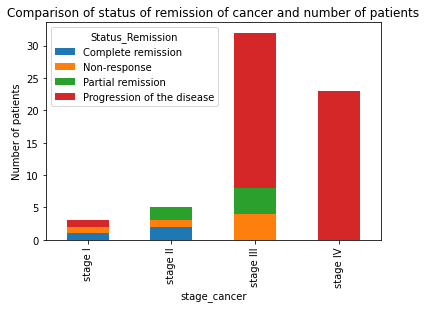

In [ ]:
# Bar Graph on the stage of cancer and status of remission of cancer
df1=df.groupby('stage_cancer')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)
plt.ylabel('Number of patients')
plt.title('Comparison of status of remission of cancer and number of patients')

In [ ]:
# Frequency table of commorbidity and status of remmision
aa=df.groupby('comorbidity')
aa['Status_Remission'].value_counts()

comorbidity  Status_Remission          
absent       Progression of the disease    20
             Non-response                   5
             Complete remission             3
             Partial remission              3
present      Progression of the disease    28
             Partial remission              3
             Non-response                   1
Name: Status_Remission, dtype: int64

Text(0.5, 1.0, 'Comparison of status of comorbidity and remission of cancer')

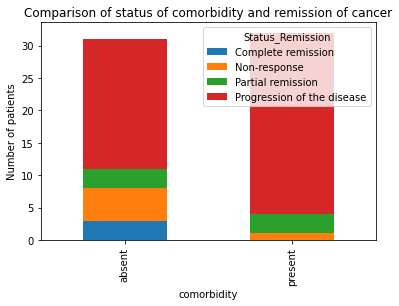

In [ ]:
# Bar graph
df_1=df.groupby('comorbidity')
df_1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True,legend='center')
plt.ylabel('Number of patients')
plt.title('Comparison of status of comorbidity and remission of cancer')

# 

In [ ]:
a=df['comorbidity']
r=df['Status_Remission']
ar=pd.crosstab(a,r)
ar

Status_Remission,Complete remission,Non-response,Partial remission,Progression of the disease
comorbidity,,,,
absent,3,5,3,20
present,0,1,3,28


Text(0.5, 1.0, 'Comparison of status of remission of cancer and number of patients')

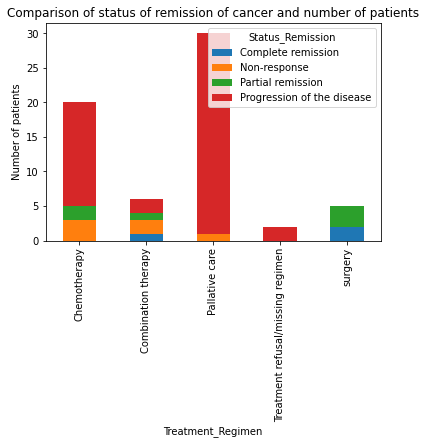

In [ ]:
df1=df.groupby('Treatment_Regimen')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)
plt.ylabel('Number of patients')
plt.title('Comparison of status of remission of cancer and number of patients')

In [ ]:
# A Percentage table of treatment regimen and remmission status
pd.crosstab(df['Treatment_Regimen'],df['Status_Remission'],normalize='index')

Status_Remission,Complete remission,Non-response,Partial remission,Progression of the disease
Treatment_Regimen,,,,
Chemotherapy,0.000000,0.150000,0.100000,0.750000
Combination therapy,0.166667,0.333333,0.166667,0.333333
Pallative care,0.000000,0.033333,0.000000,0.966667
Treatment refusal/missing regimen,0.000000,0.000000,0.000000,1.000000
surgery,0.400000,0.000000,0.600000,0.000000


In [ ]:
x=df.groupby('comorbidity')
x['Status'].value_counts()

comorbidity  Status                              
absent       Censured(Survived or Unknown status)    27
             death                                    4
present      Censured(Survived or Unknown status)    23
             death                                    9
Name: Status, dtype: int64

In [ ]:
x=df.groupby(['stage_cancer','Treatment_Regimen'])
x['Status'].value_counts()

stage_cancer  Treatment_Regimen                  Status                              
stage I       Combination therapy                Censured(Survived or Unknown status)     3
stage II      Chemotherapy                       Censured(Survived or Unknown status)     1
              Combination therapy                Censured(Survived or Unknown status)     1
              surgery                            Censured(Survived or Unknown status)     3
stage III     Chemotherapy                       Censured(Survived or Unknown status)     9
                                                 death                                    1
              Combination therapy                Censured(Survived or Unknown status)     1
              Pallative care                     Censured(Survived or Unknown status)    15
                                                 death                                    3
              Treatment refusal/missing regimen  Censured(Survived or Unknown status) 

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['Age'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.987, p=0.762
Sample looks Gaussian


In [ ]:
# #abs=df_encoded[df_encoded['stage_cancer']==1]
# #absent=abs['Status_Remission'].sample(31)

# pre=df_encoded[df_encoded['stage_cancer']==4]
# present=pre['Status_Remission'].sample(31)


In [ ]:
# abs=df_encoded.groupby(df_encoded['']=='absent')
# absent=abs['Status_Remission']
# pre=df_encoded.groupby(df_encoded['comorbidity']=='present')
# present=pre['Status_Remission']

In [ ]:
# absent=pd.to_numeric(absent)
# present=pd.to_numeric(present)

In [ ]:
# # Calculate the statistic and p value
# from scipy.stats import wilcoxon
# # compare samples
# stat, p = wilcoxon(absent,present)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
#     print('Fail to reject H0')
# else:
#     print('Reject H0')

### Hypothesis Testing


Chi-2 test
The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.


In [ ]:
# Chi square test on indendepence of Cancer stages and status of remission
ar=pd.crosstab(df['stage_cancer'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 9.165821691512042e-06
# alpha > pvalue
# We reject H0 and conclude there is evidence of association between stages of cancer and status and remission

(39.55,
 9.165821691512042e-06,
 9,
 array([[ 0.14285714,  0.28571429,  0.28571429,  2.28571429],
        [ 0.23809524,  0.47619048,  0.47619048,  3.80952381],
        [ 1.52380952,  3.04761905,  3.04761905, 24.38095238],
        [ 1.0952381 ,  2.19047619,  2.19047619, 17.52380952]]))

In [ ]:
# Chi square test on indendepence of Treatment regimen and status of remission
ar=pd.crosstab(df['Treatment_Regimen'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 4.331105732985716e-06
# alpha > pvalue
# We reject H0 and conclude there is evidence of association between treatment regimen and status remission

(47.184375,
 4.331105732985716e-06,
 12,
 array([[ 0.95238095,  1.9047619 ,  1.9047619 , 15.23809524],
        [ 0.28571429,  0.57142857,  0.57142857,  4.57142857],
        [ 1.42857143,  2.85714286,  2.85714286, 22.85714286],
        [ 0.0952381 ,  0.19047619,  0.19047619,  1.52380952],
        [ 0.23809524,  0.47619048,  0.47619048,  3.80952381]]))

In [ ]:
# Chi square test on indendepence of comorbidities and status of remission
ar=pd.crosstab(df['comorbidity'],df['Status_Remission'])
from scipy.stats import chi2_contingency
chi2_contingency(ar)

# alpha=0.05
# p value= 0.0723
# alpha < pvalue
# We fail to reject H0 and conclude there is no evidence of assiciation between commorbidity and status and remission


(6.985887096774193,
 0.07234896166765376,
 3,
 array([[ 1.47619048,  2.95238095,  2.95238095, 23.61904762],
        [ 1.52380952,  3.04761905,  3.04761905, 24.38095238]]))

In [ ]:
# # Label encoding

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df['Gender']=label_encoder.fit_transform(df['Gender'])
# df['marital_status']=label_encoder.fit_transform(df['marital_status'])
# df['Education']=label_encoder.fit_transform(df['Education'])
# df['Subsance_use']=label_encoder.fit_transform(df['Subsance_use'])
# df['occupation']=label_encoder.fit_transform(df['occupation'])
# df['Family_Histroy_cancer']=label_encoder.fit_transform(df['Family_Histroy_cancer'])
# df['Histological_type']=label_encoder.fit_transform(df['Histological_type'])
# df['Location_of_cancer']=label_encoder.fit_transform(df['Location_of_cancer'])
# df['stage_cancer']=label_encoder.fit_transform(df['stage_cancer'])
# df['comorbidity']=label_encoder.fit_transform(df['comorbidity'])
# df['Treatment_Regimen']=label_encoder.fit_transform(df['Treatment_Regimen'])
# df['Status_Remission']=label_encoder.fit_transform(df['Status_Remission'])
# df['Status']=label_encoder.fit_transform(df['Status'])
# df['Age']=label_encoder.fit_transform(df['Age'])

In [ ]:
# encoded_data=df[['Status_Remission','Location_of_cancer','marital_status','Gender','Family_Histroy_cancer','Subsance_use','Treatment_Regimen','stage_cancer','occupation','Education','Age','comorbidity','Gender']]

In [ ]:
# encoded_data['Status_Remission'].unique()

array([0, 3, 1, 2])

In [ ]:
# encoded_data.shape

(63, 13)

In [ ]:
# Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set.
# X = encoded_data.iloc[:, 1:14].values
# y = encoded_data.iloc[:, 0].values

In [ ]:
# Step 4: The following code divides data into training and test sets
#
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We now need to perform feature scaling. We execute the following code to do so:
# 
# from sklearn.preprocessing import Normalizer
# transformer = Normalizer().fit(X)
